In [11]:
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [12]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [13]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

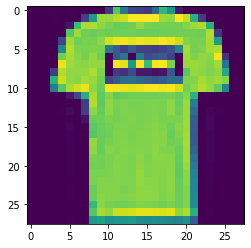

In [14]:
plt.imshow(X_train[1])

In [15]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

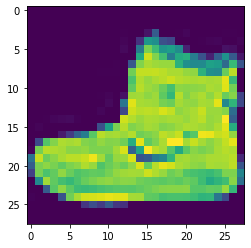

In [16]:

plt.imshow(X_train[0])


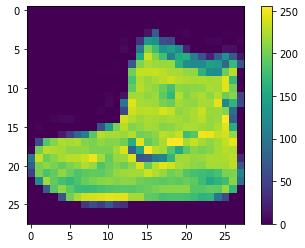

In [17]:
plt.figure()
plt.imshow(X_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [18]:
X_train=X_train/255
X_test=X_test/255

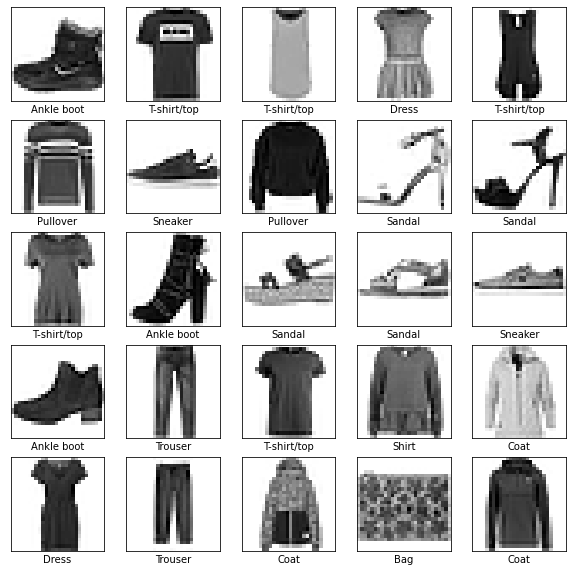

In [20]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [21]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [23]:
model.fit(X_train,y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4964 - accuracy: 0.8259
Epoch 2/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.3767 - accuracy: 0.8626
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3358 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3133 - accuracy: 0.8862
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2945 - accuracy: 0.8909
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2797 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2683 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2573 - accuracy: 0.9042
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2454 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2

In [24]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3276 - accuracy: 0.8841

Test accuracy: 0.8841000199317932


In [25]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [27]:
predictions = probability_model.predict(X_test)

In [28]:
predictions[0]

array([2.3022146e-07, 2.6077512e-07, 5.2662045e-07, 1.2259990e-07,
       7.5947878e-06, 1.3481890e-03, 7.3874611e-07, 1.2065217e-02,
       3.6493799e-07, 9.8657680e-01], dtype=float32)

In [29]:
np.argmax(predictions[0])

9

In [35]:
y_test[0]

9

In [36]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

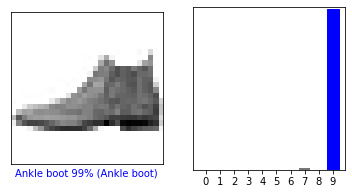

In [37]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], y_test, X_test)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  y_test)
plt.show()

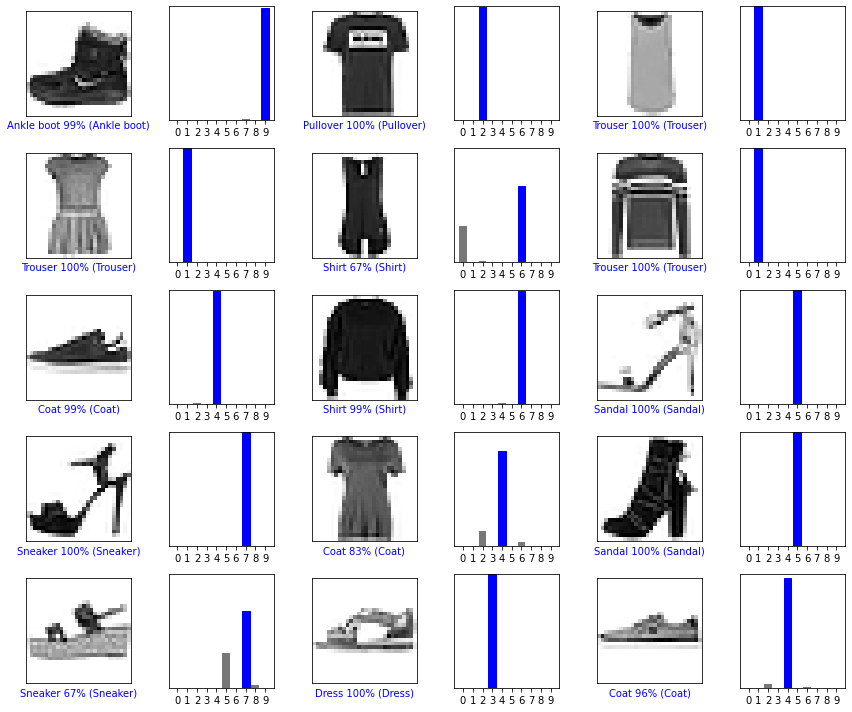

In [38]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, X_train)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

In [39]:
img =X_test[1]

print(img.shape)

(28, 28)


In [40]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [41]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[7.35777530e-06 2.37555132e-11 9.98613119e-01 1.20520915e-09
  1.26951898e-03 1.51449315e-13 1.10017165e-04 6.92129242e-13
  8.02215183e-09 3.32625942e-14]]


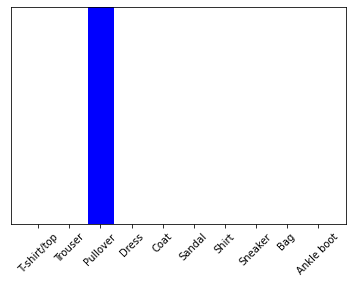

In [43]:
plot_value_array(1, predictions_single[0], y_test)
_ = plt.xticks(range(10), class_names, rotation=45)

In [44]:
np.argmax(predictions_single[0])

2